**ELEVATE LABS AI/ML INTERNSHIP TASK 5**

*📓 Task 5: K Nearest Neighbour Classification on Iris Dataset*

In [1]:
# ------------------------------------------
# 1. IMPORT LIBRARIES
# ------------------------------------------
# pandas, numpy for data handling
# sklearn for preprocessing, modeling, and metrics
# matplotlib, seaborn for visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

In [3]:
# ------------------------------------------
# 2. LOAD & INSPECT DATA
# ------------------------------------------
# Read the Iris.csv file. Ensure 'Iris.csv' is in the same directory or provide full path.
iris_df = pd.read_csv("Iris.csv")

# Display basic info
iris_df.info()
iris_df.head()

# The columns are: Id, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species
# We drop 'Id' as it is just an index and not useful for modeling.
iris_df.drop("Id", axis=1, inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# ------------------------------------------
# 3. FEATURE MATRIX & TARGET VECTOR
# ------------------------------------------
# Separate features (X) and target (y)
X = iris_df.drop("Species", axis=1)
y = iris_df["Species"]

# Check unique classes
print("Classes:", y.unique())
# (Should be: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica')


Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
# ------------------------------------------
# 4. NORMALIZATION (STANDARD SCALING)
# ------------------------------------------
# KNN relies on distance, so we standardize each feature to mean=0, std=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame if desired
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [6]:
# ------------------------------------------
# 5. TRAIN/TEST SPLIT
# ------------------------------------------
# We use 80% of data for training, 20% for testing. Use stratify=y to preserve class proportions.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Confirm shapes
print("X_train shape:", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))


X_train shape: (120, 4)
X_test shape:  (30, 4)
y_train distribution:
 Species
Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: proportion, dtype: float64
y_test distribution:
 Species
Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: proportion, dtype: float64


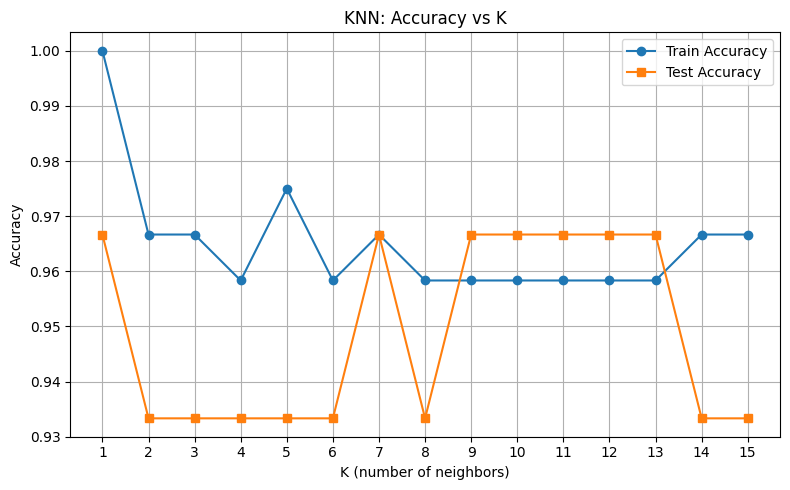

In [7]:
# ------------------------------------------
# 6. FINDING THE BEST K
# ------------------------------------------
# We will loop over k=1 to k=15, record train/test accuracy, and plot the results.

k_values = list(range(1, 16))
train_accuracy = []
test_accuracy = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Record accuracy on training set
    train_accuracy.append(knn.score(X_train, y_train))
    # Record accuracy on test set
    test_accuracy.append(knn.score(X_test, y_test))

# Plot train vs. test accuracy
plt.figure(figsize=(8, 5))
plt.plot(k_values, train_accuracy, marker='o', label="Train Accuracy")
plt.plot(k_values, test_accuracy, marker='s', label="Test Accuracy")
plt.title("KNN: Accuracy vs K")
plt.xlabel("K (number of neighbors)")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# ------------------------------------------
# 7. TRAIN & EVALUATE BEST K
# ------------------------------------------
# Identify the K with highest test set accuracy
best_k = k_values[test_accuracy.index(max(test_accuracy))]
print("Best K found:", best_k)

# Train KNN with best_k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict on test set
y_pred = knn_best.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
conf_mat = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Test Accuracy (K={}): {:.4f}".format(best_k, accuracy))
print("Confusion Matrix:\n", conf_mat)
print("Classification Report:\n", class_report)


Best K found: 1
Test Accuracy (K=1): 0.9667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

